In [4]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib
import matplotlib.pylab as plt
import random
import scikitplot as skplt

from sklearn import cross_validation

#Import sampling helper
from sklearn.model_selection import train_test_split, cross_val_score

#Import preprocessing modulesPython
from sklearn import preprocessing,metrics
from sklearn.pipeline import Pipeline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import ElasticNet
#Import evaluation metricsPython
from sklearn.metrics import mean_squared_error,r2_score

#Import cross-validation pipelinePython
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix,precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# To model the decision tree 
from sklearn.tree import DecisionTreeClassifier
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

import seaborn as sns
from math import sqrt
import scipy.stats as stats

In [1202]:
filename = "/Users/Wine.txt"
columns = ["Class","Alcohol","Malic_acid","Ash","Alcal_ash",
           "Mag","Total_ph","Flav_ph","Nonflav_ph","Proan", 
           "Color_inten","Hue","Diluted", "Proline"]
winedata = pd.read_csv(filename, header = None, sep=',',names = columns)
df = winedata.copy(deep=True)
#df= df.reset_index().values

In [100]:
winedata.shape

(178, 14)

In [101]:
winedata.head()

,Class,Alcohol,Malic_acid,Ash,Alcal_ash,Mag,Total_ph,Flav_ph,Nonflav_ph,Proan,Color_inten,Hue,Diluted,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [1203]:
# split data to X and y in numpy array
y = df['Class'].values
X = df.loc[:, 'Alcohol':].values

targetnames = X.columns

In [6]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcal_ash,Mag,Total_ph,Flav_ph,Nonflav_ph,Proan,Color_inten,Hue,Diluted,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [442]:
df.corr()

,Class,Alcohol,Malic_acid,Ash,Alcal_ash,Mag,Total_ph,Flav_ph,Nonflav_ph,Proan,Color_inten,Hue,Diluted,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcal_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mag,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_ph,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flav_ph,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflav_ph,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proan,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [55]:
#winedata.to_csv("/Users/winedata.csv")

In [407]:
# split 66% for training and 34% for testing
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=0,shuffle = True)

In [485]:
# normalized the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [477]:
# Decision tree, Navie Bayes classifers
DTree = DecisionTreeClassifier()
NB = GaussianNB()

In [437]:
param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(2, 10), 
              'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(2,10)}

In [438]:
# use GridSearch to find the best parameters 
gs_tree = GridSearchCV(DTree, param_grid, cv=10)
gs_tree.fit(X_train,y_train)
gs_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [411]:
# on 66% of training
DTree1 = DecisionTreeClassifier(min_samples_split=3,max_depth=3,
                                min_samples_leaf=7,random_state=100)
DTree1.fit(X_train,y_train)
DT_test_pred = DTree1.predict(X_test)
DT_train_pred = DTree1.predict(X_train)

In [516]:
# split 25% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=10,shuffle = True)

# on 25% training
DTree1 = DecisionTreeClassifier(min_samples_split=3,max_depth=2,
                                min_samples_leaf=2,random_state=10)
DTree1.fit(X_train,y_train)
DT_test_pred = DTree1.predict(X_test)
DT_train_pred = DTree1.predict(X_train)

# 25% training
resubstitution_error_tree1 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree1 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree1, generalization_error_tree1

2.2727272727272707 11.940298507462687


In [608]:
# split 25% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=10,shuffle = True)

# on 25% training
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 25% training
resubstitution_error_NB1 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB1 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB1, generalization_error_NB1

0.0 8.208955223880599


In [517]:
# split 35% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.35, random_state=10,shuffle = True)

# on 35% training
DTree1 = DecisionTreeClassifier(min_samples_split=3,max_depth=2,
                                min_samples_leaf=2,random_state=20)
DTree1.fit(X_train,y_train)
DT_test_pred = DTree1.predict(X_test)
DT_train_pred = DTree1.predict(X_train)

# 35% training
resubstitution_error_tree2 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree2 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree2, generalization_error_tree2

1.6129032258064502 13.793103448275868


In [499]:
# split 35% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.35, random_state=10,shuffle = True)

# on 35% training
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 35% training
resubstitution_error_NB2 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB2 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB2, generalization_error_NB2

0.0 6.034482758620685


In [501]:
# split 45% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.45, random_state=20,shuffle = True)

# 45% training 
DTree1 = DecisionTreeClassifier(min_samples_split=3,max_depth=4,
                                min_samples_leaf=2,random_state=30)
DTree1.fit(X_train,y_train)
DT_test_pred = DTree1.predict(X_test)
DT_train_pred = DTree1.predict(X_train)

# 45% training
resubstitution_error_tree3 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree3 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree3, generalization_error_tree3

1.2499999999999956 3.0612244897959218


In [502]:
# split 45% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.45, random_state=20,shuffle = True)

# on 45% training
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 45% training
resubstitution_error_NB3 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB3 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB3, generalization_error_NB3

3.749999999999998 2.0408163265306145


In [503]:
# split 55% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.55, random_state=30,shuffle = True)

# 55% training 
DTree1 = DecisionTreeClassifier(min_samples_split=2,max_depth=7,
                                min_samples_leaf=2,random_state=40)
DTree1.fit(X_train,y_train)
DT_test_pred = DTree1.predict(X_test)
DT_train_pred = DTree1.predict(X_train)

# 55% training
resubstitution_error_tree4 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree4 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100
print resubstitution_error_tree4, generalization_error_tree4

0.0 9.876543209876543


In [504]:
# split 55% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.55, random_state=30,shuffle = True)

# on 55% training
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 55% training
resubstitution_error_NB4 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB4 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB4, generalization_error_NB4

0.0 2.4691358024691357


In [505]:
# split 65% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=40,shuffle = True)

# 65% training 
DTree1 = DecisionTreeClassifier(min_samples_split=2,max_depth=3,
                                min_samples_leaf=2,random_state=50)
DTree1.fit(X_train,y_train)
DT_test_pred = DTree1.predict(X_test)
DT_train_pred = DTree1.predict(X_train)

# 65% training
resubstitution_error_tree5 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree5 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree5, generalization_error_tree5

0.8695652173912993 14.28571428571429


In [506]:
# split 65% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=40,shuffle = True)

# 65% training 
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 65% training
resubstitution_error_NB5 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB5 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB5, generalization_error_NB5

1.7391304347826098 0.0


In [514]:
# split 75% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=50,shuffle = True)

# 75% training 
DTree1 = DecisionTreeClassifier(min_samples_split=2,max_depth=3,
                                min_samples_leaf=3,random_state=60)
DTree1.fit(X_train,y_train)
DT_test_pred = DTree1.predict(X_test)
DT_train_pred = DTree1.predict(X_train)

# 75% training
resubstitution_error_tree6 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree6 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree6, generalization_error_tree6

1.5037593984962405 8.888888888888891


In [515]:
# split 75% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=40,shuffle = True)

# 75% training 
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 65% training
resubstitution_error_NB6 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB6 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB6, generalization_error_NB6

2.2556390977443663 0.0


In [535]:
# split 85% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=60,shuffle = True)

# 85% training 
DTree1 = DecisionTreeClassifier(min_samples_split=2,max_depth=3,
                                min_samples_leaf=3,random_state=70)
DTree1.fit(X_train,y_train)
DT_test_pred = DTree1.predict(X_test)
DT_train_pred = DTree1.predict(X_train)

# 85% training
resubstitution_error_tree7 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree7 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree7, generalization_error_tree7

0.6622516556291425 0.0


In [579]:
# split 85% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=60,shuffle = True)

# 85% training 
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 85% training
resubstitution_error_NB7 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB7 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB7, generalization_error_NB7

2.6490066225165587 0.0


In [ ]:
resubstitution_error_tree = []
resubstitution_error_tree.extend((resubstitution_error_tree1,resubstitution_error_tree2,
                                 resubstitution_error_tree3,resubstitution_error_tree4,
                                 resubstitution_error_tree5,resubstitution_error_tree6,
                                 resubstitution_error_tree7))
resubstitution_error_NB = []
resubstitution_error_NB.extend((resubstitution_error_NB1,resubstitution_error_NB2,
                                 resubstitution_error_NB3,resubstitution_error_NB4,
                                 resubstitution_error_NB5,resubstitution_error_NB6,
                                 resubstitution_error_NB7))

generalization_error_tree = []
generalization_error_NB = []

generalization_error_tree.extend((generalization_error_tree1,generalization_error_tree2,
                                 generalization_error_tree3,generalization_error_tree4,
                                 generalization_error_tree5,generalization_error_tree6,
                                 generalization_error_tree7))
generalization_error_NB.extend((generalization_error_NB1,generalization_error_NB2,
                               generalization_error_NB3,generalization_error_NB4,
                               generalization_error_NB5,generalization_error_NB6,
                               generalization_error_NB7))

In [611]:
generalization_error_NB

[8.208955223880599,
 6.034482758620685,
 2.0408163265306145,
 2.4691358024691357,
 0.0,
 0.0,
 0.0]

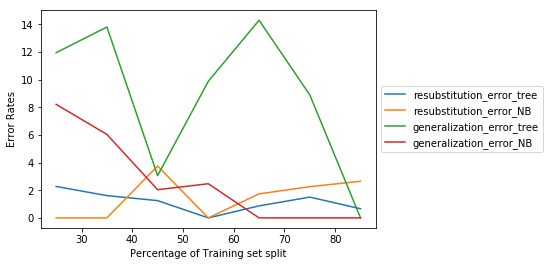

In [623]:
x = range(25,90,10)

plt.xlabel("Percentage of Training set split")
plt.ylabel("Error Rates")

plt.plot(x, resubstitution_error_tree, label = "resubstitution_error_tree")
plt.plot(x, resubstitution_error_NB, label = "resubstitution_error_NB")
plt.plot(x, generalization_error_tree, label = "generalization_error_tree")
plt.plot(x, generalization_error_NB, label = "generalization_error_NB")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [412]:
# Gaussian Navie Bayes classifier
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

In [413]:
n_train = len(X_train) + len(y_train)
n_train

234

In [414]:
n_test = len(X_test) + len(y_test)
n_test

122

In [415]:
# Get Decision tree classifier train and test mean and variance
outputs = []
outputs1 = []

RMSE_tree = sqrt(mean_squared_error(y_test,DT_test_pred))
RMSE_tree1 = sqrt(mean_squared_error(y_train,DT_train_pred))

outputs.append(RMSE_tree)
outputs1.append(RMSE_tree1)


mean_tree_test = sum(outputs)/10
mean_tree_train = sum(outputs1)/10

variance_tree_test = sum((x-mean_tree_test)**2 for x in outputs)
variance_tree_train = sum((x-mean_tree_train)**2 for x in outputs1)

std_tree_test = sqrt(variance_tree_test)
std_tree_train = sqrt(variance_tree_train)

CI_test = (mean_tree_test + 1.96*((std_tree_test)/sqrt(n_test)),
           mean_tree_test - 1.96*((std_tree_test)/sqrt(n_test)))

CI_train = (mean_tree_train + 1.96*((std_tree_train)/sqrt(n_train)),
           mean_tree_train - 1.96*((std_tree_train)/sqrt(n_train)))

print "Decision tree classifier testing set mean is:", mean_tree_test, "and variance is:", variance_tree_test
print "Decision tree classifier training set mean is:", mean_tree_train, "and variance is:", variance_tree_train
print ""

print "Decision tree classifier testing set Confidence Interval is:", CI_test
print ""
print "Decision tree classifier training set Confidence Interval is:", CI_train
print ""


print "The accuracy on training data set is" ,metrics.accuracy_score(y_train, DT_train_pred)
print ""
print "The accuracy on testing data set is" ,metrics.accuracy_score(y_test, DT_test_pred)



Decision tree classifier testing set mean is: 0.0256073759866 and variance is: 0.0531147540984
Decision tree classifier training set mean is: 0.0184900065408 and variance is: 0.0276923076923

Decision tree classifier testing set Confidence Interval is: (0.06650365015094215, -0.015288898177783748)

Decision tree classifier training set Confidence Interval is: (0.03981199563508148, -0.0028319825533995382)

The accuracy on training data set is 0.9658119658119658

The accuracy on testing data set is 0.9344262295081968


In [416]:
ACC_DT_test = metrics.accuracy_score(y_test, DT_test_pred)
ACC_DT_test

0.9344262295081968

In [421]:
ACC_NB_test = metrics.accuracy_score(y_test, NB_test_pre)
ACC_NB_test

0.9508196721311475

In [418]:
# Get Navie Bayes classifier train and test mean and variance
lists = []
lists1 = []

RMSE_NB = sqrt(mean_squared_error(y_test,NB_test_pre))
RMSE_NB1 = sqrt(mean_squared_error(y_train,NB_train_pre))

lists.append(RMSE_NB)
lists1.append(RMSE_NB1)


mean_NB_test = sum(lists)/10
mean_NB_train = sum(lists1)/10

variance_NB_test = sum((x-mean_NB_test)**2 for x in lists)
variance_NB_train = sum((x-mean_NB_train)**2 for x in lists1)

std_NB_test = sqrt(variance_NB_test)
std_NB_train = sqrt(variance_NB_train)

CI_NB_test = (mean_NB_test + 1.96*((std_NB_test)/sqrt(n_test)),
           mean_NB_test - 1.96*((std_NB_test)/sqrt(n_test)))

CI_NB_train = (mean_NB_train + 1.96*((std_NB_train)/sqrt(n_train)),
           mean_NB_train - 1.96*((std_NB_train)/sqrt(n_train)))

print "Navie Bayes classifier testing set mean is:", mean_NB_test, "and variance is:", variance_NB_test
print "Navie Bayes classifier training set mean is:", mean_NB_train, "and variance is:", variance_NB_train
print ""

print "Navie Bayes classifier testing set Confidence Interval is:", CI_NB_test
print ""
print "Navie Bayes classifier training set Confidence Interval is:", CI_NB_train
print ""


print "The accuracy on training data set is" ,metrics.accuracy_score(y_train, NB_train_pre)
print ""
print "The accuracy on testing data set is" ,metrics.accuracy_score(y_test, NB_test_pre)


Navie Bayes classifier testing set mean is: 0.0221766381286 and variance is: 0.0398360655738
Navie Bayes classifier training set mean is: 0.0130744090092 and variance is: 0.0138461538462

Navie Bayes classifier testing set Confidence Interval is: (0.057593850475108704, -0.013240574217834335)

Navie Bayes classifier training set Confidence Interval is: (0.02815133208613535, -0.0020025140677108096)

The accuracy on training data set is 0.9829059829059829

The accuracy on testing data set is 0.9508196721311475


In [430]:
# Using a pair t-test, compare the mean accuracy of the Naïve Bayes 
#and the mean accuracy of the Decision tree and discuss the results.
stats.ttest_rel(NB_test_pre,DT_test_pred)

Ttest_relResult(statistic=-2.3145502494313788, pvalue=0.024077327443763293)

In [271]:
import numpy as np, statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(NB_test_pre), sms.DescrStatsW(DT_test_pred))
print cm.tconfint_diff(usevar='unequal')

(-0.36487801596637665, 0.2009435897368687)


In [218]:
DT_acc_train = metrics.accuracy_score(y_train, DT_train_pred)
DT_acc_test = metrics.accuracy_score(y_test, DT_test_pred)

In [219]:
NB_acc_train = metrics.accuracy_score(y_train, NB_train_pre)
NB_acc_test = metrics.accuracy_score(y_test, NB_test_pre)

## Problem 3 a.	Repeat Problem 2.b from Assignment#1 on the Wine Recognition Dataset but this time considering only two classes (let us say, class 1 (positive class) versus class 2 and class 3 (negative class) since the ROC and lift curves can only be drawn for binary classification problems).

In [1292]:
y1 = y
X1 = X

In [1293]:
# transform class 1 to positive value 1, and class 2 and 3 to 0 (negative value)
def transform (y):
    return (y==1) *1

In [1294]:
# transform y1 'class'
y1 = transform(y1)

In [1269]:
# split 66% for training and 34% for testing
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.34, random_state=0,shuffle = True)
    
# normalized the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

In [1263]:
from sklearn import metrics
from ggplot import *
# ROC on testing set
fpr, tpr, threshold= metrics.roc_curve(y_test, NB_test_pre)
roc_auc = metrics.auc(fpr, tpr)
# ROC on training set
fpr1,tpr1, threshold = metrics.roc_curve(y_train, NB_train_pre)
roc_auc1 = metrics.auc(fpr1, tpr1)

In [1209]:
threshold

array([2, 1, 0])

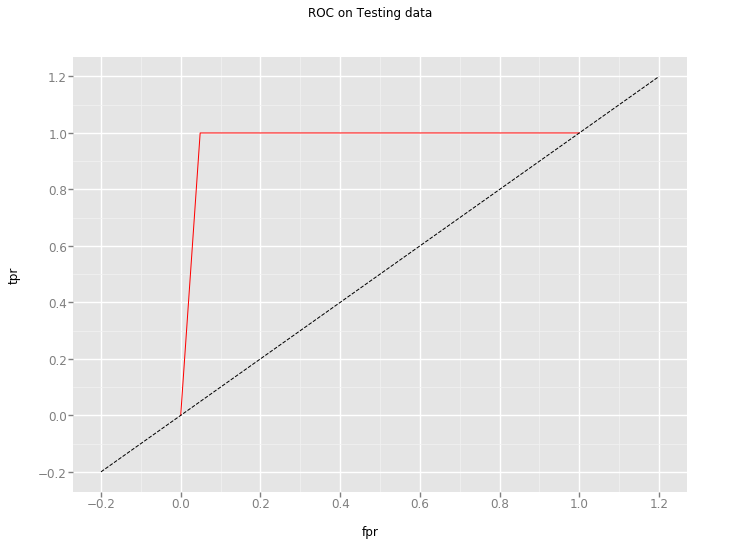

<ggplot: (291222737)>

In [714]:
# make a dataframe for fpr and tpr
df2 = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df2, aes(x='fpr', y='tpr')) +\
    geom_line(color='red') +\
    geom_abline(linetype='dashed') +\
    ggtitle("ROC on Testing data")

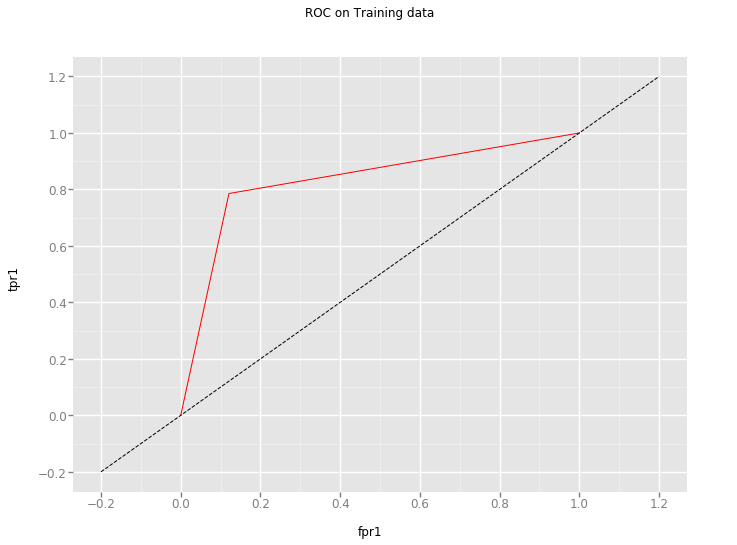

<ggplot: (294884085)>

In [1311]:
# make a dataframe for fpr and tpr
df3 = pd.DataFrame(dict(fpr1=fpr1, tpr1=tpr1))
ggplot(df3, aes(x='fpr1', y='tpr1')) +\
    geom_line(color='red') +\
    geom_abline(linetype='dashed') +\
    ggtitle("ROC on Training data")

In [1305]:
# split 66% for training and 34% for testing
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.34, random_state=0,shuffle = True)
    
# normalized the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

In [1309]:
nb_probas = NB.fit(X_train, y_train).predict_proba(X_test)
train_probas = NB.fit(X_train, y_train).predict_proba(X_train)

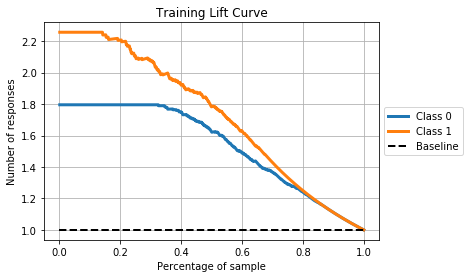

In [1310]:
skplt.metrics.plot_lift_curve(y_train, train_probas)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Training Lift Curve")
plt.ylabel("Number of responses")
plt.show()

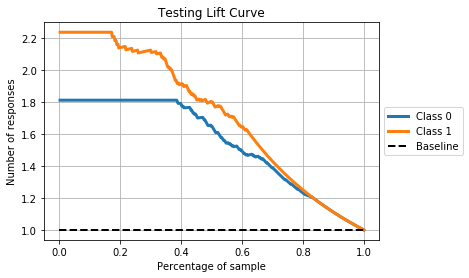

In [1307]:
skplt.metrics.plot_lift_curve(y_test, nb_probas)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Testing Lift Curve")
plt.ylabel("Number of responses")
plt.show()

### Problem 4: 
### The breast cancer Wisconsin dataset consists of 569 instances and 32 features.  The class variable represents diagnosis (M=malignant, B=benign) and the features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

In [1164]:
# read wisconsin cancer data
data = pd.read_csv('/Users/ivy/Desktop/CSC529 /Assignments/wisconsin.csv')
dfw = data.copy(deep=True)

In [1165]:
dfw.shape

(569, 32)

In [1166]:
dfw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1167]:
dfw['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [1168]:
# map dataframe to integer value
dfw['diagnosis']=dfw['diagnosis'].map({'M':1,'B':0})

In [1169]:
y = dfw['diagnosis'].values
X = dfw.loc[:, 'diagnosis':].values

In [1170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle = True)

In [1171]:
# normalized the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1097]:
dfw.isnull().sum().sum()

0

In [1172]:
tree = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(2, 10), 
              'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(2,10)}
gs_tree = GridSearchCV(tree, param_grid, cv=10)
gs_tree.fit(X_train,y_train)
gs_tree.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

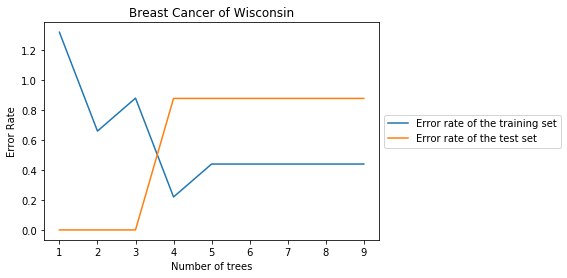

In [1180]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection


#training_accuracy = []
#test_accuracy = []

train_error = []
test_error = []

max_dep = range(1,10)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=100)
    
    bagging = BaggingClassifier(base_estimator=tree,random_state=10,max_samples=0.5, max_features=0.5)
    bagging.fit(X_train,y_train)
    bagging_test_pred = bagging.predict(X_test)
    bagging_train_pred = bagging.predict(X_train)
    
    #training_accuracy.append(bagging.score(X_train, y_train))
    #test_accuracy.append(bagging.score(X_test, y_test))
    
    train_error.append((1-bagging.score(X_train, y_train))*100)
    test_error.append((1-bagging.score(X_test, y_test))*100)

plt.plot(max_dep,train_error, label='Error rate of the training set')
plt.plot(max_dep,test_error, label='Error rate of the test set')
plt.ylabel('Error Rate')
plt.xlabel('Number of trees')
plt.title("Breast Cancer of Wisconsin")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

##### plot accuracy score
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of trees')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Extra credit on winequality and banknote

In [1210]:
data = pd.read_csv('/Users/ivy/Desktop/CSC529 /Assignments/HW3/winequality_red.csv')
dfwine = data.copy(deep=True)
dfwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1211]:
dfwine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [1212]:
dfwine.isnull().sum().sum()

0

In [1213]:
y = dfwine['quality']#.values
X = dfwine.drop('quality', axis = 1)#.values

In [1217]:
# split 25% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=10,shuffle = True)

# on 25% training
DTree1 = DecisionTreeClassifier(min_samples_split=3,max_depth=5,
                                min_samples_leaf=9,random_state=10)
DTree1.fit(X_train,y_train)
DT_test_pred = DTree1.predict(X_test)
DT_train_pred = DTree1.predict(X_train)

# 25% training
resubstitution_error_tree1 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree1 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree1, generalization_error_tree1

# on 25% training
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 25% training
resubstitution_error_NB1 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB1 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB1, generalization_error_NB1

28.57142857142857 45.666666666666664
43.10776942355889 47.75


In [1220]:
# split 35% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.35, random_state=10,shuffle = True)

# on 35% training
DTree2 = DecisionTreeClassifier(min_samples_split=3,max_depth=5,
                                min_samples_leaf=9,random_state=20)
DTree2.fit(X_train,y_train)
DT_test_pred = DTree2.predict(X_test)
DT_train_pred = DTree2.predict(X_train)

# 35% training
resubstitution_error_tree2 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree2 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree2, generalization_error_tree2

# on 35% training
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 35% training
resubstitution_error_NB2 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB2 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB2, generalization_error_NB2

29.87477638640429 40.38461538461539
43.291592128801426 47.21153846153846


In [1221]:
# split 45% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.45, random_state=20,shuffle = True)

# 45% training 
DTree3 = DecisionTreeClassifier(min_samples_split=3,max_depth=5,
                                min_samples_leaf=9,random_state=30)
DTree3.fit(X_train,y_train)
DT_test_pred = DTree3.predict(X_test)
DT_train_pred = DTree3.predict(X_train)

# 45% training
resubstitution_error_tree3 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree3 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree3, generalization_error_tree3

# on 45% training
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 45% training
resubstitution_error_NB3 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB3 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB3, generalization_error_NB3

31.98887343532685 45.11363636363637
44.92350486787204 46.02272727272727


In [1222]:
# split 55% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.55, random_state=30,shuffle = True)

# 55% training 
DTree4 = DecisionTreeClassifier(min_samples_split=3,max_depth=5,
                                min_samples_leaf=9,random_state=40)
DTree4.fit(X_train,y_train)
DT_test_pred = DTree4.predict(X_test)
DT_train_pred = DTree4.predict(X_train)

# 55% training
resubstitution_error_tree4 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree4 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100
print resubstitution_error_tree4, generalization_error_tree4

# on 55% training
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 55% training
resubstitution_error_NB4 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB4 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB4, generalization_error_NB4

35.72241183162684 41.94444444444444
45.05119453924915 49.02777777777778


In [1223]:
# split 65% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=40,shuffle = True)

# 65% training 
DTree5 = DecisionTreeClassifier(min_samples_split=3,max_depth=5,
                                min_samples_leaf=9,random_state=50)
DTree5.fit(X_train,y_train)
DT_test_pred = DTree5.predict(X_test)
DT_train_pred = DTree5.predict(X_train)

# 65% training
resubstitution_error_tree5 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree5 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree5, generalization_error_tree5

# 65% training 
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 65% training
resubstitution_error_NB5 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB5 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB5, generalization_error_NB5

32.33878729547642 41.785714285714285
44.369586140519736 44.64285714285714


In [1224]:
# split 75% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=50,shuffle = True)

# 75% training 
DTree6 = DecisionTreeClassifier(min_samples_split=3,max_depth=5,
                                min_samples_leaf=9,random_state=60)
DTree6.fit(X_train,y_train)
DT_test_pred = DTree6.predict(X_test)
DT_train_pred = DTree6.predict(X_train)

# 75% training
resubstitution_error_tree6 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree6 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree6, generalization_error_tree6

# 75% training 
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 75% training
resubstitution_error_NB6 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB6 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB6, generalization_error_NB6

36.19683069224353 47.75
43.45287739783152 43.25


In [1227]:
# split 85% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=60,shuffle = True)

# 85% training 
DTree7 = DecisionTreeClassifier(min_samples_split=3,max_depth=5,
                                min_samples_leaf=9,random_state=70)
DTree7.fit(X_train,y_train)
DT_test_pred = DTree7.predict(X_test)
DT_train_pred = DTree7.predict(X_train)

# 85% training
resubstitution_error_tree7 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree7 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree7, generalization_error_tree7

# 85% training 
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 85% training
resubstitution_error_NB7 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB7 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB7, generalization_error_NB7

33.627667402501835 36.25000000000001
43.34069168506255 41.25


In [1228]:
resubstitution_error_tree = []
resubstitution_error_tree.extend((resubstitution_error_tree1,resubstitution_error_tree2,
                                 resubstitution_error_tree3,resubstitution_error_tree4,
                                 resubstitution_error_tree5,resubstitution_error_tree6,
                                 resubstitution_error_tree7))
resubstitution_error_NB = []
resubstitution_error_NB.extend((resubstitution_error_NB1,resubstitution_error_NB2,
                                 resubstitution_error_NB3,resubstitution_error_NB4,
                                 resubstitution_error_NB5,resubstitution_error_NB6,
                                 resubstitution_error_NB7))

generalization_error_tree = []
generalization_error_NB = []

generalization_error_tree.extend((generalization_error_tree1,generalization_error_tree2,
                                 generalization_error_tree3,generalization_error_tree4,
                                 generalization_error_tree5,generalization_error_tree6,
                                 generalization_error_tree7))
generalization_error_NB.extend((generalization_error_NB1,generalization_error_NB2,
                               generalization_error_NB3,generalization_error_NB4,
                               generalization_error_NB5,generalization_error_NB6,
                               generalization_error_NB7))

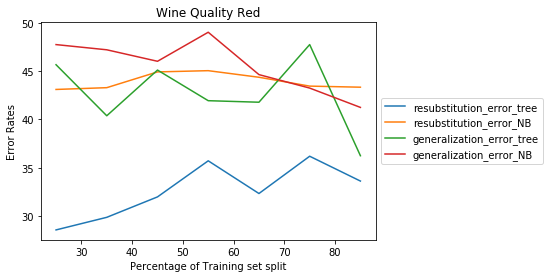

In [1229]:
x = range(25,90,10)

plt.xlabel("Percentage of Training set split")
plt.ylabel("Error Rates")
plt.title("Wine Quality Red")
plt.plot(x, resubstitution_error_tree, label = "resubstitution_error_tree")
plt.plot(x, resubstitution_error_NB, label = "resubstitution_error_NB")
plt.plot(x, generalization_error_tree, label = "generalization_error_tree")
plt.plot(x, generalization_error_NB, label = "generalization_error_NB")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Extra credit on problem 4

In [1162]:
y = dfwine['quality']#.values
X = dfwine.drop('quality', axis = 1)#.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42,shuffle = True)

# normalized the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1047]:
wine_tree = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(2, 10), 
              'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(2,10)}
gs_tree = GridSearchCV(wine_tree, param_grid, cv=10)
gs_tree.fit(X_train,y_train)
gs_tree.best_params_

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 9,
 'min_samples_split': 3}

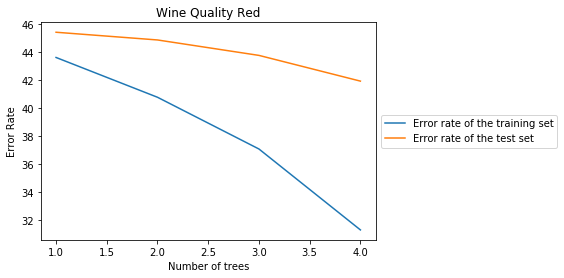

In [1163]:
train_error = []
test_error = []

max_dep = range(1,5)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    
    bagging = BaggingClassifier(base_estimator=tree,random_state=10)
    bagging.fit(X_train,y_train)
    bagging_test_pred = bagging.predict(X_test)
    bagging_train_pred = bagging.predict(X_train)
    
    #training_accuracy.append(bagging.score(X_train, y_train))
    #test_accuracy.append(bagging.score(X_test, y_test))
    
    train_error.append((1-bagging.score(X_train, y_train))*100)
    test_error.append((1-bagging.score(X_test, y_test))*100)

plt.plot(max_dep,train_error, label='Error rate of the training set')
plt.plot(max_dep,test_error, label='Error rate of the test set')
plt.ylabel('Error Rate')
plt.xlabel('Number of trees')
plt.title("Wine Quality Red")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Banknote data 

In [1233]:
filename = "/Users/ivy/Desktop/CSC529 /Assignments/HW3/data_banknote_authentication.txt"
columns = ["variance_of_Wavelet_Transformed_image","skewness_of_Wavelet_Transformed_image",
           "curtosis_of_Wavelet_Transformed_image","entropy_of_image","class"]
bank = pd.read_csv(filename, header = None, sep=',',names = columns)
dfb = bank.copy(deep=True)
#df= df.reset_index().values

In [1234]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance_of_Wavelet_Transformed_image    1372 non-null float64
skewness_of_Wavelet_Transformed_image    1372 non-null float64
curtosis_of_Wavelet_Transformed_image    1372 non-null float64
entropy_of_image                         1372 non-null float64
class                                    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [1235]:
dfb['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [1236]:
dfb.isnull().sum().sum()

0

In [1237]:
y = dfb['class']#.values
X = dfb.drop('class', axis = 1)#.values

In [1238]:
# split 25% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=10,shuffle = True)

# on 25% training
DTree1 = DecisionTreeClassifier(min_samples_split=2,max_depth=9,
                                min_samples_leaf=2,random_state=10)
DTree1.fit(X_train,y_train)
DT_test_pred = DTree1.predict(X_test)
DT_train_pred = DTree1.predict(X_train)

# 25% training
resubstitution_error_tree1 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree1 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree1, generalization_error_tree1

# on 25% training
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 25% training
resubstitution_error_NB1 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB1 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB1, generalization_error_NB1

0.8746355685131157 4.081632653061229
16.034985422740522 16.034985422740522


In [1239]:
# split 35% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.35, random_state=10,shuffle = True)

# on 35% training
DTree2 = DecisionTreeClassifier(min_samples_split=2,max_depth=9,
                                min_samples_leaf=2,random_state=20)
DTree2.fit(X_train,y_train)
DT_test_pred = DTree2.predict(X_test)
DT_train_pred = DTree2.predict(X_train)

# 35% training
resubstitution_error_tree2 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree2 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree2, generalization_error_tree2

# on 35% training
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 35% training
resubstitution_error_NB2 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB2 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB2, generalization_error_NB2

0.4166666666666652 3.363228699551568
15.625 14.910313901345296


In [1240]:
# split 45% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.45, random_state=20,shuffle = True)

# 45% training 
DTree3 = DecisionTreeClassifier(min_samples_split=2,max_depth=9,
                                min_samples_leaf=2,random_state=30)
DTree3.fit(X_train,y_train)
DT_test_pred = DTree3.predict(X_test)
DT_train_pred = DTree3.predict(X_train)

# 45% training
resubstitution_error_tree3 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree3 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree3, generalization_error_tree3

# on 45% training
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 45% training
resubstitution_error_NB3 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB3 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB3, generalization_error_NB3

0.32414910858995505 1.7218543046357615
16.369529983792543 14.966887417218544


In [1241]:
# split 55% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.55, random_state=30,shuffle = True)

# 55% training 
DTree4 = DecisionTreeClassifier(min_samples_split=2,max_depth=9,
                                min_samples_leaf=2,random_state=40)
DTree4.fit(X_train,y_train)
DT_test_pred = DTree4.predict(X_test)
DT_train_pred = DTree4.predict(X_train)

# 55% training
resubstitution_error_tree4 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree4 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100
print resubstitution_error_tree4, generalization_error_tree4

# on 55% training
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 55% training
resubstitution_error_NB4 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB4 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB4, generalization_error_NB4

0.2652519893899252 3.7216828478964348
15.251989389920428 16.34304207119741


In [1242]:
# split 65% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.65, random_state=40,shuffle = True)

# 65% training 
DTree5 = DecisionTreeClassifier(min_samples_split=2,max_depth=9,
                                min_samples_leaf=2,random_state=50)
DTree5.fit(X_train,y_train)
DT_test_pred = DTree5.predict(X_test)
DT_train_pred = DTree5.predict(X_train)

# 65% training
resubstitution_error_tree5 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree5 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree5, generalization_error_tree5

# 65% training 
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 65% training
resubstitution_error_NB5 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB5 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB5, generalization_error_NB5

0.11223344556677839 2.9106029106029108
14.590347923681257 16.216216216216218


In [1243]:
# split 75% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=50,shuffle = True)

# 75% training 
DTree6 = DecisionTreeClassifier(min_samples_split=2,max_depth=9,
                                min_samples_leaf=2,random_state=60)
DTree6.fit(X_train,y_train)
DT_test_pred = DTree6.predict(X_test)
DT_train_pred = DTree6.predict(X_train)

# 75% training
resubstitution_error_tree6 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree6 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree6, generalization_error_tree6

# 75% training 
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 75% training
resubstitution_error_NB6 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB6 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB6, generalization_error_NB6

0.38872691933916625 2.0408163265306145
16.034985422740522 16.034985422740522


In [1244]:
# split 85% for training 
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=60,shuffle = True)

# 85% training 
DTree7 = DecisionTreeClassifier(min_samples_split=2,max_depth=9,
                                min_samples_leaf=2,random_state=70)
DTree7.fit(X_train,y_train)
DT_test_pred = DTree7.predict(X_test)
DT_train_pred = DTree7.predict(X_train)

# 85% training
resubstitution_error_tree7 = (1-metrics.accuracy_score(y_train, DT_train_pred))*100

generalization_error_tree7 = (1 - metrics.accuracy_score(y_test, DT_test_pred)) * 100

print resubstitution_error_tree7, generalization_error_tree7

# 85% training 
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

# 85% training
resubstitution_error_NB7 = (1-metrics.accuracy_score(y_train, NB_train_pre))*100

generalization_error_NB7 = (1 - metrics.accuracy_score(y_test, NB_test_pre)) * 100

print resubstitution_error_NB7, generalization_error_NB7

0.34305317324184736 0.9708737864077666
16.12349914236707 12.135922330097081


In [1245]:
resubstitution_error_tree = []
resubstitution_error_tree.extend((resubstitution_error_tree1,resubstitution_error_tree2,
                                 resubstitution_error_tree3,resubstitution_error_tree4,
                                 resubstitution_error_tree5,resubstitution_error_tree6,
                                 resubstitution_error_tree7))
resubstitution_error_NB = []
resubstitution_error_NB.extend((resubstitution_error_NB1,resubstitution_error_NB2,
                                 resubstitution_error_NB3,resubstitution_error_NB4,
                                 resubstitution_error_NB5,resubstitution_error_NB6,
                                 resubstitution_error_NB7))

generalization_error_tree = []
generalization_error_NB = []

generalization_error_tree.extend((generalization_error_tree1,generalization_error_tree2,
                                 generalization_error_tree3,generalization_error_tree4,
                                 generalization_error_tree5,generalization_error_tree6,
                                 generalization_error_tree7))
generalization_error_NB.extend((generalization_error_NB1,generalization_error_NB2,
                               generalization_error_NB3,generalization_error_NB4,
                               generalization_error_NB5,generalization_error_NB6,
                               generalization_error_NB7))

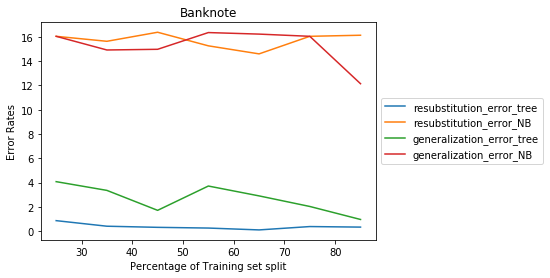

In [1246]:
x = range(25,90,10)

plt.xlabel("Percentage of Training set split")
plt.ylabel("Error Rates")
plt.title("Banknote")
plt.plot(x, resubstitution_error_tree, label = "resubstitution_error_tree")
plt.plot(x, resubstitution_error_NB, label = "resubstitution_error_NB")
plt.plot(x, generalization_error_tree, label = "generalization_error_tree")
plt.plot(x, generalization_error_NB, label = "generalization_error_NB")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Extra credit for problem 4

In [1195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42,shuffle = True)

# normalized the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1196]:
bank_tree = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(2, 10), 
              'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(2,10)}
gs_tree = GridSearchCV(bank_tree, param_grid, cv=10)
gs_tree.fit(X_train,y_train)
gs_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

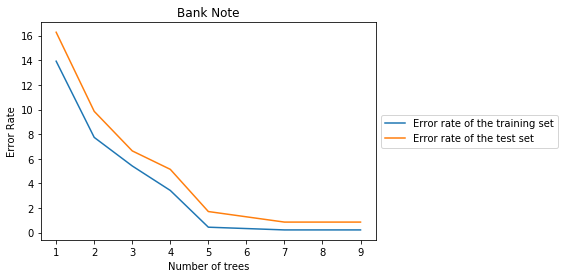

In [1201]:
train_error = []
test_error = []

max_dep = range(1,10)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    
    bagging = BaggingClassifier(base_estimator=tree,random_state=10)
    bagging.fit(X_train,y_train)
    bagging_test_pred = bagging.predict(X_test)
    bagging_train_pred = bagging.predict(X_train)
    
    #training_accuracy.append(bagging.score(X_train, y_train))
    #test_accuracy.append(bagging.score(X_test, y_test))
    
    train_error.append((1-bagging.score(X_train, y_train))*100)
    test_error.append((1-bagging.score(X_test, y_test))*100)

plt.plot(max_dep,train_error, label='Error rate of the training set')
plt.plot(max_dep,test_error, label='Error rate of the test set')
plt.ylabel('Error Rate')
plt.xlabel('Number of trees')
plt.title("Bank Note")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()